In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

d:\softwares\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\softwares\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
nonattack_params = pd.read_csv("dataset/nonattack/simulation_parameters.csv")
attack_params = pd.read_csv("dataset/attack/attack_parameters.csv")

In [4]:
nonattack_params.head()

,test_case,n,ue_posn,ue_vel
0,1,3,"-37,36,0,-46,49,0,-30,21,0","-6,2,0,-10,7,0,-7,7,0"
1,2,4,"12,-11,0,-24,-12,0,20,41,0,-4,-6,0","8,-10,0,9,-1,0,0,9,0,-4,-5,0"
2,3,5,"-35,-35,0,34,-9,0,42,30,0,33,18,0,-43,-48,0","-1,9,0,-4,0,0,-7,8,0,8,-2,0,0,8,0"
3,4,6,"-28,4,0,29,17,0,-45,-49,0,10,-42,0,-40,8,0,-31...","-6,1,0,-7,9,0,7,-3,0,-2,6,0,-8,4,0,-5,-9,0"
4,5,7,"29,-22,0,-27,-33,0,29,27,0,10,7,0,7,-1,0,40,0,...","-8,-8,0,-5,5,0,3,2,0,-1,8,0,-4,0,0,-1,4,0,-7,-3,0"


In [6]:
attack_params.head()

,testcase,ue_list,noise_db,tx_power_db,start_time,end_time
0,1,"2,3",26.19,12.87,1.021183,1.688284
1,2,4,19.32,25.52,0.775680,1.229469
2,3,"3,2",19.66,21.28,1.295688,1.985717
3,4,"4,2,1",19.53,15.13,0.597156,1.755974
4,5,"3,5,6,1,7,2",19.63,10.37,0.453392,0.836695


### TC4
n = 6    
ue_list=[4, 2, 1]  
UAV 3, 5, 6 are not attacked. UAV 1, 2, 4 are attacked.

In [8]:
# Load CSV files into DataFrames
ue1_rssi_attack = pd.read_csv("dataset/attack/TC4/UE1_rssi.csv")
ue2_rssi_attack = pd.read_csv("dataset/attack/TC4/UE2_rssi.csv")
ue3_rssi_attack = pd.read_csv("dataset/attack/TC4/UE3_rssi.csv")
ue4_rssi_attack = pd.read_csv("dataset/attack/TC4/UE4_rssi.csv")
ue5_rssi_attack = pd.read_csv("dataset/attack/TC4/UE5_rssi.csv")
ue6_rssi_attack = pd.read_csv("dataset/attack/TC4/UE6_rssi.csv")

ue1_rssi_nonattack = pd.read_csv("dataset/nonattack/TC4/UE1_rssi.csv")
ue2_rssi_nonattack = pd.read_csv("dataset/nonattack/TC4/UE2_rssi.csv")
ue3_rssi_nonattack = pd.read_csv("dataset/nonattack/TC4/UE3_rssi.csv")
ue4_rssi_nonattack = pd.read_csv("dataset/nonattack/TC4/UE4_rssi.csv")
ue5_rssi_nonattack = pd.read_csv("dataset/nonattack/TC4/UE5_rssi.csv")
ue6_rssi_nonattack = pd.read_csv("dataset/nonattack/TC4/UE6_rssi.csv")

ue1_sinr_attack = pd.read_csv("dataset/attack/TC4/UE1_sinr.csv")
ue2_sinr_attack = pd.read_csv("dataset/attack/TC4/UE2_sinr.csv")
ue3_sinr_attack = pd.read_csv("dataset/attack/TC4/UE3_sinr.csv")
ue4_sinr_attack = pd.read_csv("dataset/attack/TC4/UE4_sinr.csv")
ue5_sinr_attack = pd.read_csv("dataset/attack/TC4/UE5_sinr.csv")
ue6_sinr_attack = pd.read_csv("dataset/attack/TC4/UE6_sinr.csv")

ue1_sinr_nonattack = pd.read_csv("dataset/nonattack/TC4/UE1_sinr.csv")
ue2_sinr_nonattack = pd.read_csv("dataset/nonattack/TC4/UE2_sinr.csv")
ue3_sinr_nonattack = pd.read_csv("dataset/nonattack/TC4/UE3_sinr.csv")
ue4_sinr_nonattack = pd.read_csv("dataset/nonattack/TC4/UE4_sinr.csv")
ue5_sinr_nonattack = pd.read_csv("dataset/nonattack/TC4/UE5_sinr.csv")
ue6_sinr_nonattack = pd.read_csv("dataset/nonattack/TC4/UE6_sinr.csv")

In [9]:
print(ue1_rssi_attack.shape)
print(ue1_sinr_attack.shape)

(137003, 2)
(14363, 2)


In [11]:
def reduce_rssi_data(df, group_size=4):
    # Step 1: Average RSSI for duplicate timestamps
    df_reduced = df.groupby('Time', as_index=False)['RSSI'].mean()
    
    # Step 2: Group every `group_size` rows and aggregate
    n = len(df_reduced)
    num_groups = n // group_size
    
    # Extract values as numpy arrays for efficient reshaping
    time_values = df_reduced['Time'].values[:num_groups * group_size]
    rssi_values = df_reduced['RSSI'].values[:num_groups * group_size]
    
    # Reshape and compute medians/means
    time_median = np.median(time_values.reshape(-1, group_size), axis=1)
    rssi_mean = np.mean(rssi_values.reshape(-1, group_size), axis=1)
    
    # Create new DataFrame
    reduced_df = pd.DataFrame({'Time': time_median, 'RSSI': rssi_mean})
    
    print(f"Reduced shape: {reduced_df.shape} (from original {df.shape})")
    return reduced_df


In [12]:
ue1_rssi_reduced = reduce_rssi_data(ue1_rssi_attack, 4)
ue1_rssi_attack = ue1_rssi_reduced
ue2_rssi_reduced = reduce_rssi_data(ue2_rssi_attack, 4)
ue2_rssi_attack = ue2_rssi_reduced
ue3_rssi_reduced = reduce_rssi_data(ue3_rssi_attack, 4)
ue3_rssi_attack = ue3_rssi_reduced
ue4_rssi_reduced = reduce_rssi_data(ue4_rssi_attack, 4)
ue4_rssi_attack = ue4_rssi_reduced
ue5_rssi_reduced = reduce_rssi_data(ue5_rssi_attack, 4)
ue5_rssi_attack = ue5_rssi_reduced
ue6_rssi_reduced = reduce_rssi_data(ue6_rssi_attack, 4)
ue6_rssi_attack = ue6_rssi_reduced

Reduced shape: (26250, 2) (from original (137003, 2))
Reduced shape: (26212, 2) (from original (136848, 2))
Reduced shape: (26128, 2) (from original (136514, 2))
Reduced shape: (25975, 2) (from original (135902, 2))
Reduced shape: (26135, 2) (from original (136542, 2))
Reduced shape: (25097, 2) (from original (132391, 2))


In [13]:
ue1_rssi_reduced = reduce_rssi_data(ue1_rssi_nonattack, 4)
ue1_rssi_nonattack = ue1_rssi_reduced
ue2_rssi_reduced = reduce_rssi_data(ue2_rssi_nonattack, 4)
ue2_rssi_nonattack = ue2_rssi_reduced
ue3_rssi_reduced = reduce_rssi_data(ue3_rssi_nonattack, 4)
ue3_rssi_nonattack = ue3_rssi_reduced
ue4_rssi_reduced = reduce_rssi_data(ue4_rssi_nonattack, 4)
ue4_rssi_nonattack = ue4_rssi_reduced
ue5_rssi_reduced = reduce_rssi_data(ue5_rssi_nonattack, 4)
ue5_rssi_nonattack = ue5_rssi_reduced
ue6_rssi_reduced = reduce_rssi_data(ue6_rssi_nonattack, 4)
ue6_rssi_nonattack = ue6_rssi_reduced

Reduced shape: (26250, 2) (from original (137003, 2))
Reduced shape: (26212, 2) (from original (136848, 2))
Reduced shape: (26128, 2) (from original (136514, 2))
Reduced shape: (25975, 2) (from original (135902, 2))
Reduced shape: (26135, 2) (from original (136542, 2))
Reduced shape: (25097, 2) (from original (132391, 2))


In [17]:
def create_ue_comparison_figure(sinr_attack, sinr_nonattack, rssi_attack, rssi_nonattack, ue_num):
    # Create figure with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Convert pandas Series to numpy arrays explicitly
    # SINR plot (left subplot)
    ax1.plot(np.array(sinr_attack['Time']), np.array(sinr_attack['SINR']), 'r-', label='Attack')
    ax1.plot(np.array(sinr_nonattack['Time']), np.array(sinr_nonattack['SINR']), 'b-', label='Non-Attack')
    ax1.set_title(f'UE{ue_num} SINR Comparison')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('SINR (dB)')
    ax1.legend()
    ax1.grid()
    
    # RSSI plot (right subplot)
    ax2.plot(np.array(rssi_attack['Time']), np.array(rssi_attack['RSSI']), 'r-', label='Attack')
    ax2.plot(np.array(rssi_nonattack['Time']), np.array(rssi_nonattack['RSSI']), 'b-', label='Non-Attack')
    ax2.set_title(f'UE{ue_num} RSSI Comparison')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('RSSI (dBm)')
    ax2.legend()
    ax2.grid()
    
    plt.tight_layout()
    plt.show()

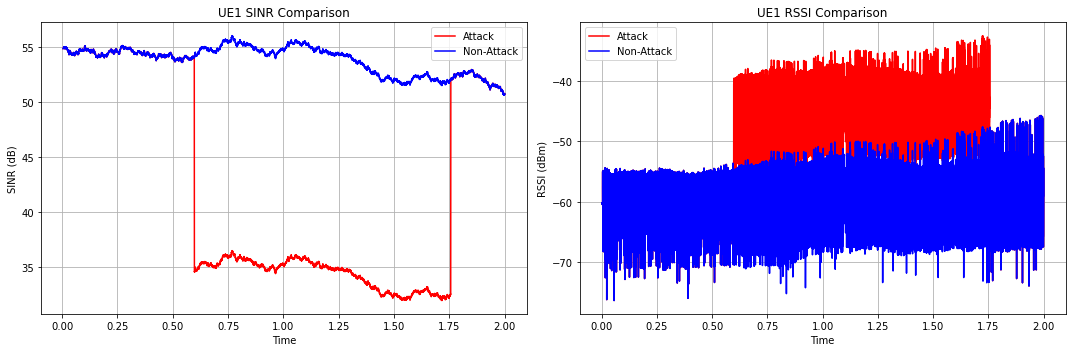

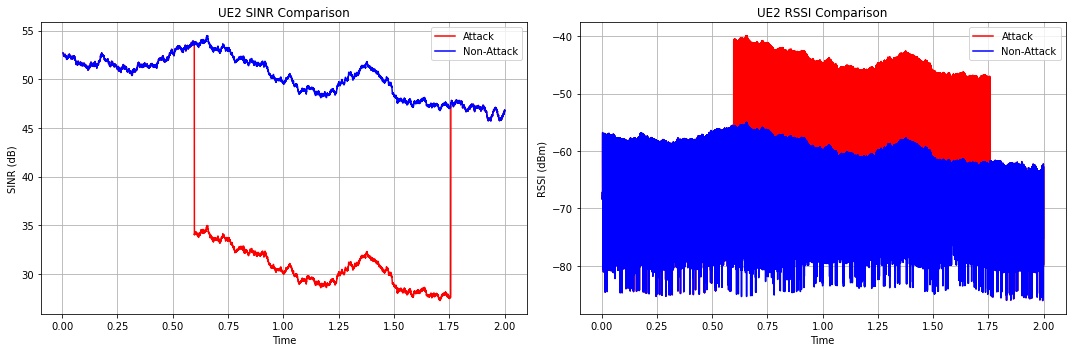

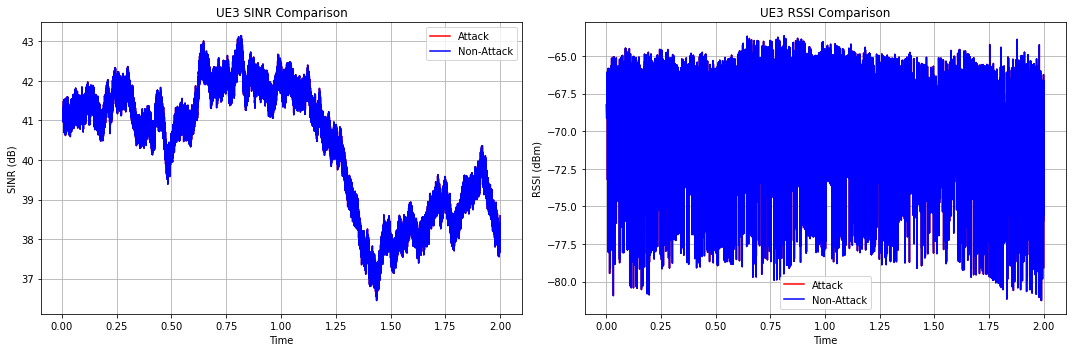

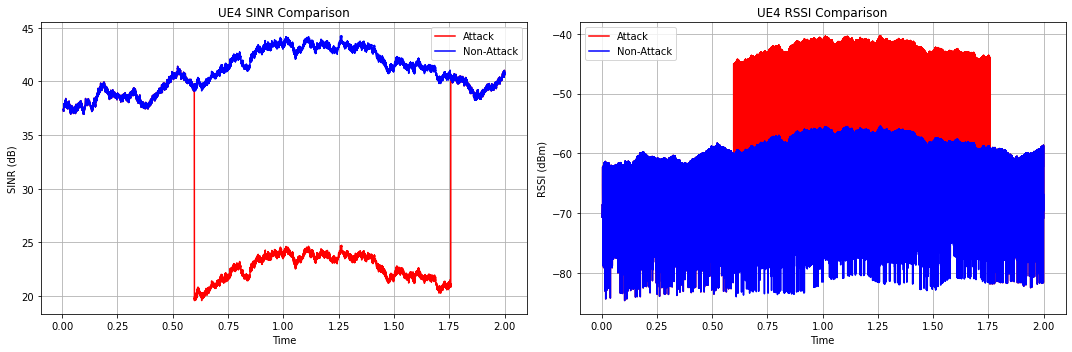

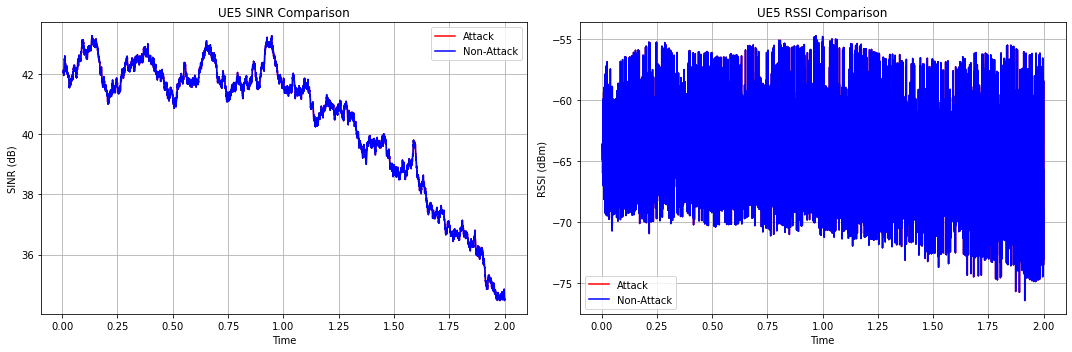

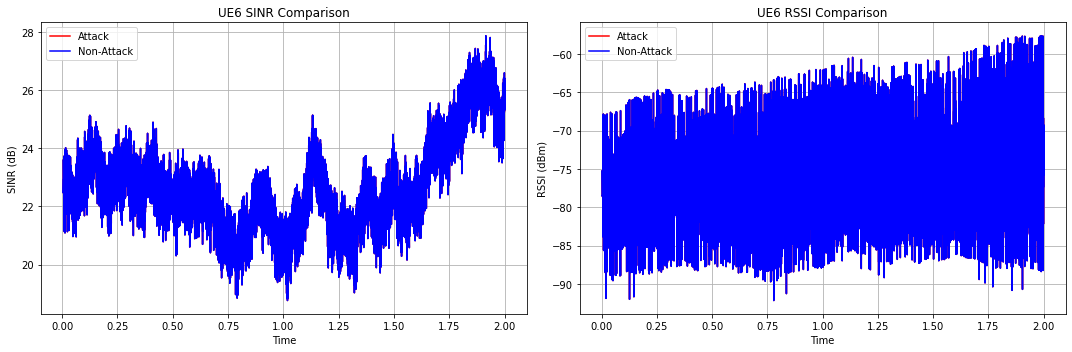

In [23]:
# Create figures for each UE
create_ue_comparison_figure(ue1_sinr_attack, ue1_sinr_nonattack, ue1_rssi_attack, ue1_rssi_nonattack, 1)
create_ue_comparison_figure(ue2_sinr_attack, ue2_sinr_nonattack, ue2_rssi_attack, ue2_rssi_nonattack, 2)
create_ue_comparison_figure(ue3_sinr_attack, ue3_sinr_nonattack, ue3_rssi_attack, ue3_rssi_nonattack, 3)
create_ue_comparison_figure(ue4_sinr_attack, ue4_sinr_nonattack, ue4_rssi_attack, ue4_rssi_nonattack, 4)
create_ue_comparison_figure(ue5_sinr_attack, ue5_sinr_nonattack, ue5_rssi_attack, ue5_rssi_nonattack, 5)
create_ue_comparison_figure(ue6_sinr_attack, ue6_sinr_nonattack, ue6_rssi_attack, ue6_rssi_nonattack, 6)

### Attack Parameters
Noise = 19.53dB  
TxPower = 15.13dB  
Start Time = 0.597156s	  
End Time = 1.755974s  

In [26]:
def create_comparison_plot(attack_df, nonattack_df, metric, ue_num, start_time=0.0, end_time=None):
    # Filter data based on time bounds
    attack_filtered = attack_df[(attack_df['Time'] >= start_time) & 
                      ((attack_df['Time'] <= end_time) if end_time is not None else True)]
    nonattack_filtered = nonattack_df[(nonattack_df['Time'] >= start_time) & 
                        ((nonattack_df['Time'] <= end_time) if end_time is not None else True)]
    
    plt.figure(figsize=(10, 5))
    plt.plot(np.array(attack_filtered['Time']), np.array(attack_filtered[metric]), 'r-', label='Attack')
    plt.plot(np.array(nonattack_filtered['Time']), np.array(nonattack_filtered[metric]), 'b-', label='Non-Attack')
    plt.title(f'UE{ue_num} {metric} Comparison (Time: {start_time}-{end_time if end_time else "max"})')
    plt.xlabel('Time')
    plt.ylabel(f'{metric} ({"dB" if metric == "SINR" else "dBm"})')
    plt.legend()
    plt.grid()
    plt.show()

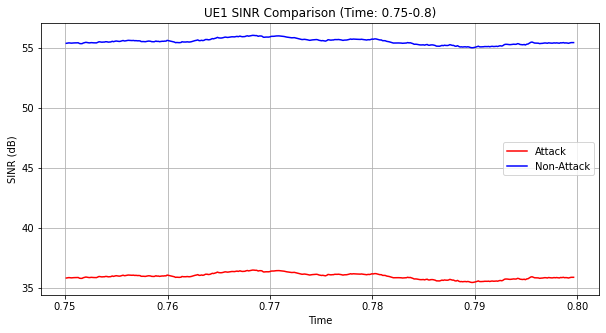

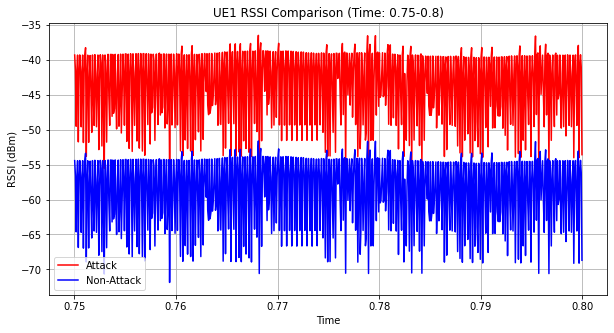

In [30]:
# Example usage with time bounds:
create_comparison_plot(ue1_sinr_attack, ue1_sinr_nonattack, 'SINR', 1, start_time=0.75, end_time=0.80)
create_comparison_plot(ue1_rssi_attack, ue1_rssi_nonattack, 'RSSI', 1, start_time=0.75, end_time=0.80)

## TC2
n=4, UE3 is attacked.

In [31]:
# Load CSV files into DataFrames
ue1_rssi_attack = pd.read_csv("dataset_small/attack/TC2/UE1_rssi.csv")
ue2_rssi_attack = pd.read_csv("dataset_small/attack/TC2/UE2_rssi.csv")
ue3_rssi_attack = pd.read_csv("dataset_small/attack/TC2/UE3_rssi.csv")
ue4_rssi_attack = pd.read_csv("dataset_small/attack/TC2/UE4_rssi.csv")
ue1_rssi_nonattack = pd.read_csv("dataset_small/nonattack/TC2/UE1_rssi.csv")
ue2_rssi_nonattack = pd.read_csv("dataset_small/nonattack/TC2/UE2_rssi.csv")
ue3_rssi_nonattack = pd.read_csv("dataset_small/nonattack/TC2/UE3_rssi.csv")
ue4_rssi_nonattack = pd.read_csv("dataset_small/nonattack/TC2/UE4_rssi.csv")

ue1_sinr_attack = pd.read_csv("dataset_small/attack/TC2/UE1_sinr.csv")
ue2_sinr_attack = pd.read_csv("dataset_small/attack/TC2/UE2_sinr.csv")
ue3_sinr_attack = pd.read_csv("dataset_small/attack/TC2/UE3_sinr.csv")
ue4_sinr_attack = pd.read_csv("dataset_small/attack/TC2/UE4_sinr.csv")
ue1_sinr_nonattack = pd.read_csv("dataset_small/nonattack/TC2/UE1_sinr.csv")
ue2_sinr_nonattack = pd.read_csv("dataset_small/nonattack/TC2/UE2_sinr.csv")
ue3_sinr_nonattack = pd.read_csv("dataset_small/nonattack/TC2/UE3_sinr.csv")
ue4_sinr_nonattack = pd.read_csv("dataset_small/nonattack/TC2/UE4_sinr.csv")

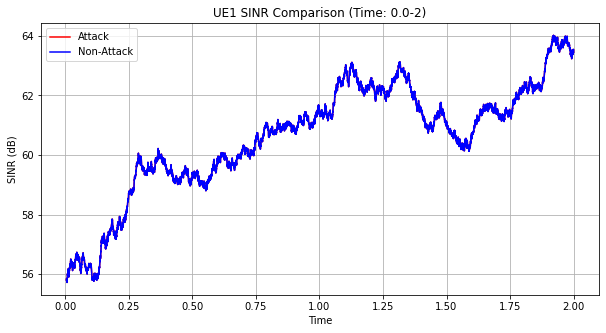

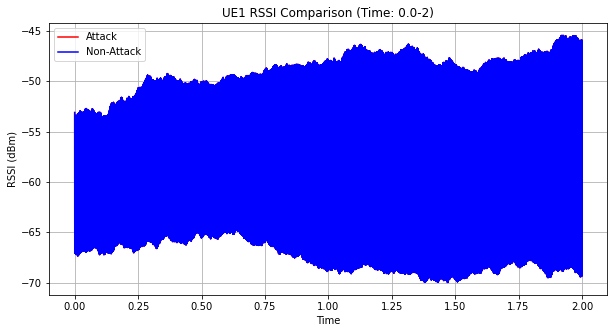

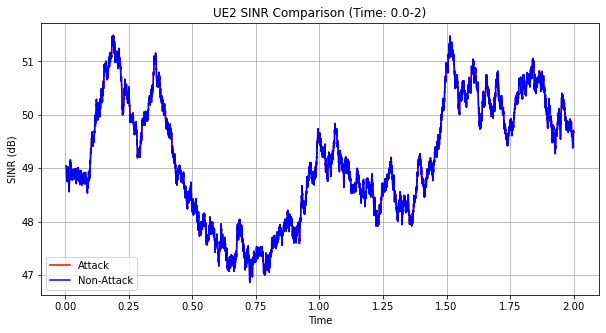

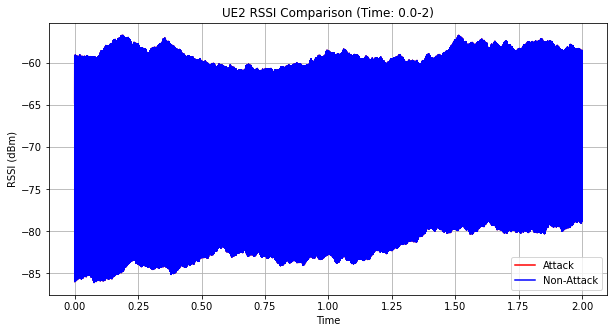

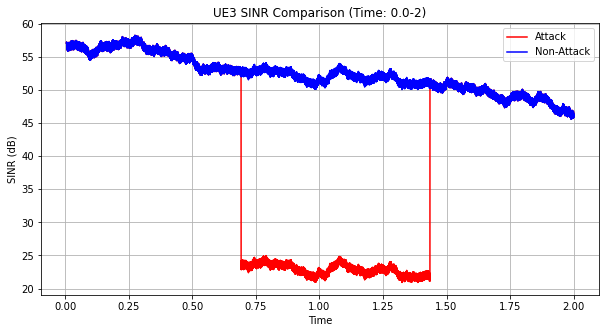

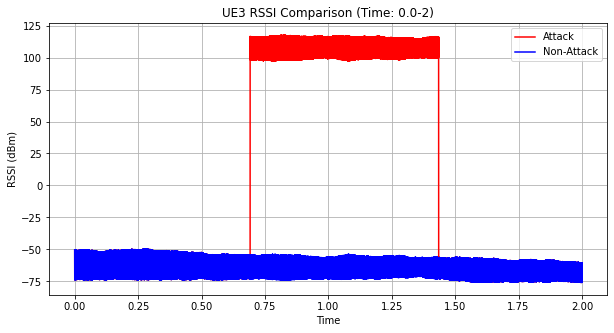

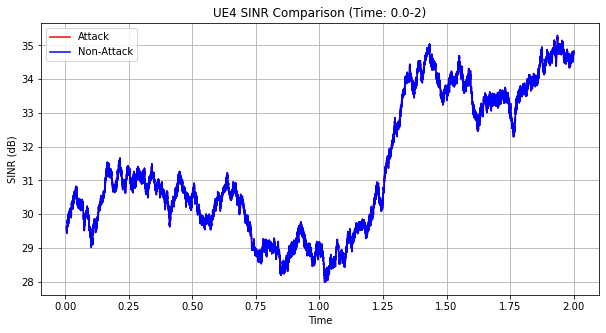

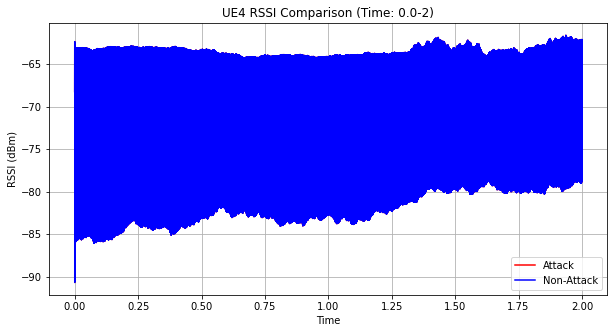

In [32]:
# Example usage with time bounds:
create_comparison_plot(ue1_sinr_attack, ue1_sinr_nonattack, 'SINR', 1, start_time=0.0, end_time=2)
create_comparison_plot(ue1_rssi_attack, ue1_rssi_nonattack, 'RSSI', 1, start_time=0.0, end_time=2)

create_comparison_plot(ue2_sinr_attack, ue2_sinr_nonattack, 'SINR', 2, start_time=0.0, end_time=2)
create_comparison_plot(ue2_rssi_attack, ue2_rssi_nonattack, 'RSSI', 2, start_time=0.0, end_time=2)

create_comparison_plot(ue3_sinr_attack, ue3_sinr_nonattack, 'SINR', 3, start_time=0.0, end_time=2)
create_comparison_plot(ue3_rssi_attack, ue3_rssi_nonattack, 'RSSI', 3, start_time=0.0, end_time=2)

create_comparison_plot(ue4_sinr_attack, ue4_sinr_nonattack, 'SINR', 4, start_time=0.0, end_time=2)
create_comparison_plot(ue4_rssi_attack, ue4_rssi_nonattack, 'RSSI', 4, start_time=0.0, end_time=2)

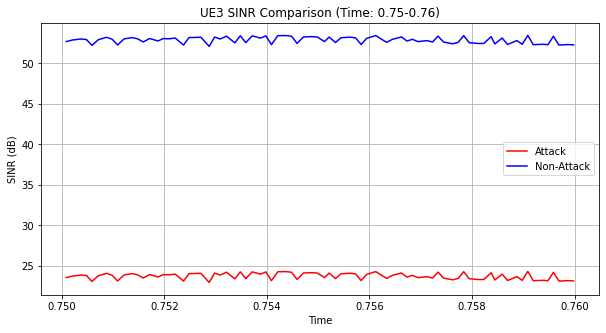

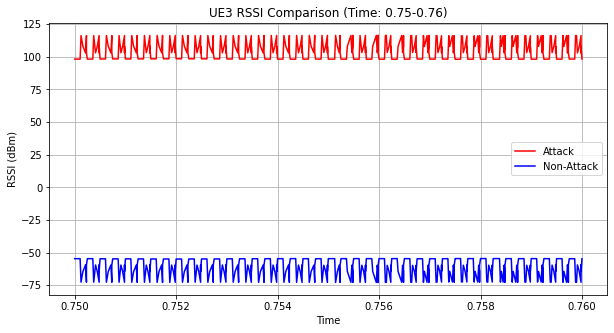

In [58]:
create_comparison_plot(ue3_sinr_attack, ue3_sinr_nonattack, 'SINR', 3, start_time=0.75, end_time=0.76)
create_comparison_plot(ue3_rssi_attack, ue3_rssi_nonattack, 'RSSI', 3, start_time=0.75, end_time=0.76)